#### Import necessary Packages

In [3]:
import pandas as pd
import os

## Task 1: Merge 12 months of sales data csv files into single csv file 

In [4]:
df = pd.read_csv("SalesAnalysis/Sales_data/Sales_April_2019.csv")
files = [file for file in os.listdir('SalesAnalysis/Sales_data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index = False)

#### Read updated DataFrame

In [5]:

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Clean up the Data

#### The First step is to figure out what we need to Clean. I will clean as I perform Operations and get errors. Based on those errors, I will decide what to clean.

#### Remove all rows with NaN

In [6]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Get Rid of text in Order Date Columns

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Make Columns of correct type

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Remove all orders from 2004

In [9]:
all_data = all_data[all_data['Order Date'].str[0:4]!='2004']

#### Show Table after all the cleanup

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001"


## Augment Table with Additional Columns

#### Now we will add more columns to analyze the data.

#### Add a month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4


## Add a City Column

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco (CA)
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco (CA)
10,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration Time!

### What was the best month for sales? How much was earned that month?

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
results = all_data.groupby(['Month']).sum()
results[0:12]

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,12356,2.056151e+06,2.071078e+06
5,18638,3.124570e+06,3.142047e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


As we can see, December had the most amount of sales.


### Which City Shold the most Product?

In [20]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),15954,2.663445e+06,102421,2.678063e+06,205764,425570,14284
Austin (TX),10725,1.746798e+06,68297,1.755849e+06,136474,277678,9522
Boston (MA),21663,3.513732e+06,138134,3.537370e+06,277129,567951,19167
Dallas (TX),16135,2.659684e+06,102554,2.674490e+06,207052,419751,14296
Los Angeles (CA),31961,5.217719e+06,203642,5.247895e+06,410703,830480,28423
New York City (NY),26831,4.452838e+06,171820,4.480795e+06,343103,704189,23892
Portland (ME),2641,4.275455e+05,16756,4.300239e+05,33855,69869,2358
Portland (OR),10843,1.782149e+06,69107,1.791867e+06,138739,283881,9624
San Francisco (CA),48201,7.881658e+06,308472,7.929906e+06,617175,1265956,42925


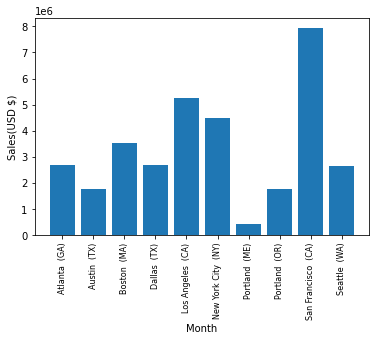

In [21]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales(USD $)')
plt.xlabel('Month')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

As we can see, San Francisco sold the most product. 

### What time should we display advertisements to maximize likelihood of customer's buying product?

#### Add a hours column

In [22]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco (CA),11.95,13,3,1
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco (CA),1700.00,10,38,1
10,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,17,18,1


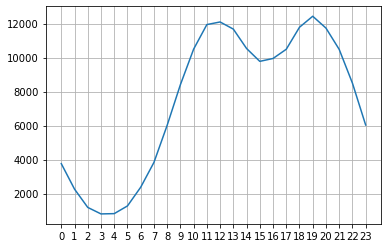

In [23]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm.

### What Products are most often sold together?

In [26]:
# Reference: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Reference: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

<ipython-input-26-0a29ed98d646>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [27]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 958
('Google Phone', 'USB-C Charging Cable') 938
('iPhone', 'Wired Headphones') 435
('Google Phone', 'Wired Headphones') 400
('Vareebadd Phone', 'USB-C Charging Cable') 350
('iPhone', 'Apple Airpods Headphones') 340
('Google Phone', 'Bose SoundSport Headphones') 207
('USB-C Charging Cable', 'Wired Headphones') 155
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 90


## What Product was sold the most?

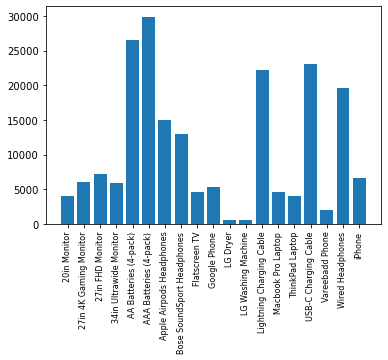

In [28]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

As we can see, AAA batteries were the most popular product sold.